In [36]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
import itertools as it
import seaborn as sns
from collections import Counter
import numpy
from matplotlib.pyplot import figure

In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('pastel')


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [3]:
max_strat = 6
min_strat = -5
max_score = 5
min_score = -5

pairs = 300
generations = 30 * pow(10,3)
print(generations)
population = 100

cost = 0.1
benefit = 1

mutation = 0.001
# TODO -> Mais pequeno

simulations = pow(10, 0) 



30000


In [4]:
class Agent:
    def __init__(self, strategy, score, payoff):
        self.payoff = payoff
        self.strategy = strategy
        self.score = score
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score <= min_score:
            self.score = min_score
        elif temp_score >= max_score:
            self.score = max_score

In [5]:
def selectOne(population):
    max_value     = sum([c.payoff for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    for agent in population:
        current += agent.payoff
        if current > pick:
                return agent

In [6]:
def ProbabilityList(population_d):
    fitness = [c.payoff for c in population_d ]
    total_fit = sum(fitness)
    relative_fitness = [f/total_fit for f in fitness]
    return relative_fitness

def FitnessChoices(population, relative_fitness, number):
    return random.choices(population, weights = relative_fitness, k = number)

In [7]:
mean_strategy_per_generation = []
mean_payoff_per_generation = []
global_strategies = []


for simulation in range(simulations) :
  
    agents = []
    for i in range(population):
        agents.append(Agent(random.randint(min_strat, max_strat), 0,0))
    

    for generation in range(generations) :
        if(generation % 1000 == 0):
            print(generation)
        for pair in range(pairs) :
            donor,recipient = random.sample(agents, 2)

            if recipient.score >= donor.strategy:
                
                recipient.payoff += benefit
                donor.add_score(benefit)
            else:
                donor.add_score(-benefit)

            recipient.payoff += cost
            
                
        payoffs = []
        for agent in agents:
            payoffs.append(agent.payoff)

        
        new_agents = []
        agents.sort(key=lambda x: x.payoff, reverse=True)
        for agent in range(len(agents)):
        
            randomValue    = random.uniform(0.0, 1.0)
            if randomValue <= mutation:
                new_agents.append(Agent(random.randint(min_strat, max_strat), 0,0))
            else:
                parent = selectOne(agents)
                new_agents.append(Agent(parent.strategy, 0,0))
       
        
        agents = new_agents
                
            
        estrategias = []
        total = 0
        for agent in agents:
            estrategias.append(agent.strategy)
            global_strategies.append(agent.strategy)
            
        #print(Counter(estrategias))
        estrategias_numpy = numpy.array(estrategias)
        payoffs_numpy = numpy.array(payoffs)

        
        #plt.hist(arr)
        #plt.axvline(arr.mean(), color='k', linestyle='dashed', linewidth=1)
        #plt.show()
        
        mean_strategy_per_generation.append(estrategias_numpy.mean())
        mean_payoff_per_generation.append(payoffs_numpy.mean())
        


#print(Counter(mean_strategy_per_generation))
        
global_strategies_numpy = numpy.array(global_strategies)
#plt.plot(mean_strategy_per_generation)
#plt.show()
print("Done! :D")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
Done! :D


In [8]:
sum(mean_strategy_per_generation)/len(mean_strategy_per_generation)


-3.177944999999994

In [45]:
def get_graph_with_color_and_size(width, height, dpi, data, background_color, palette_color, y_lim):
    figure(figsize=(width, height), dpi=dpi)
    ax = plt.gca()
    ax.set_facecolor(background_color)
    if y_lim > 0:
        ax.set_ylim([0, y_lim])

    plt.xlabel('Time (thousands of generations)',fontname='Helvetica')
    plt.ylabel('Strategy, k',fontname='Helvetica')
    plt.title('Average k for every generation',fontname='Helvetica')
    plt.plot(data, color=sns.color_palette('Set2')[palette_color])
    plt.show()

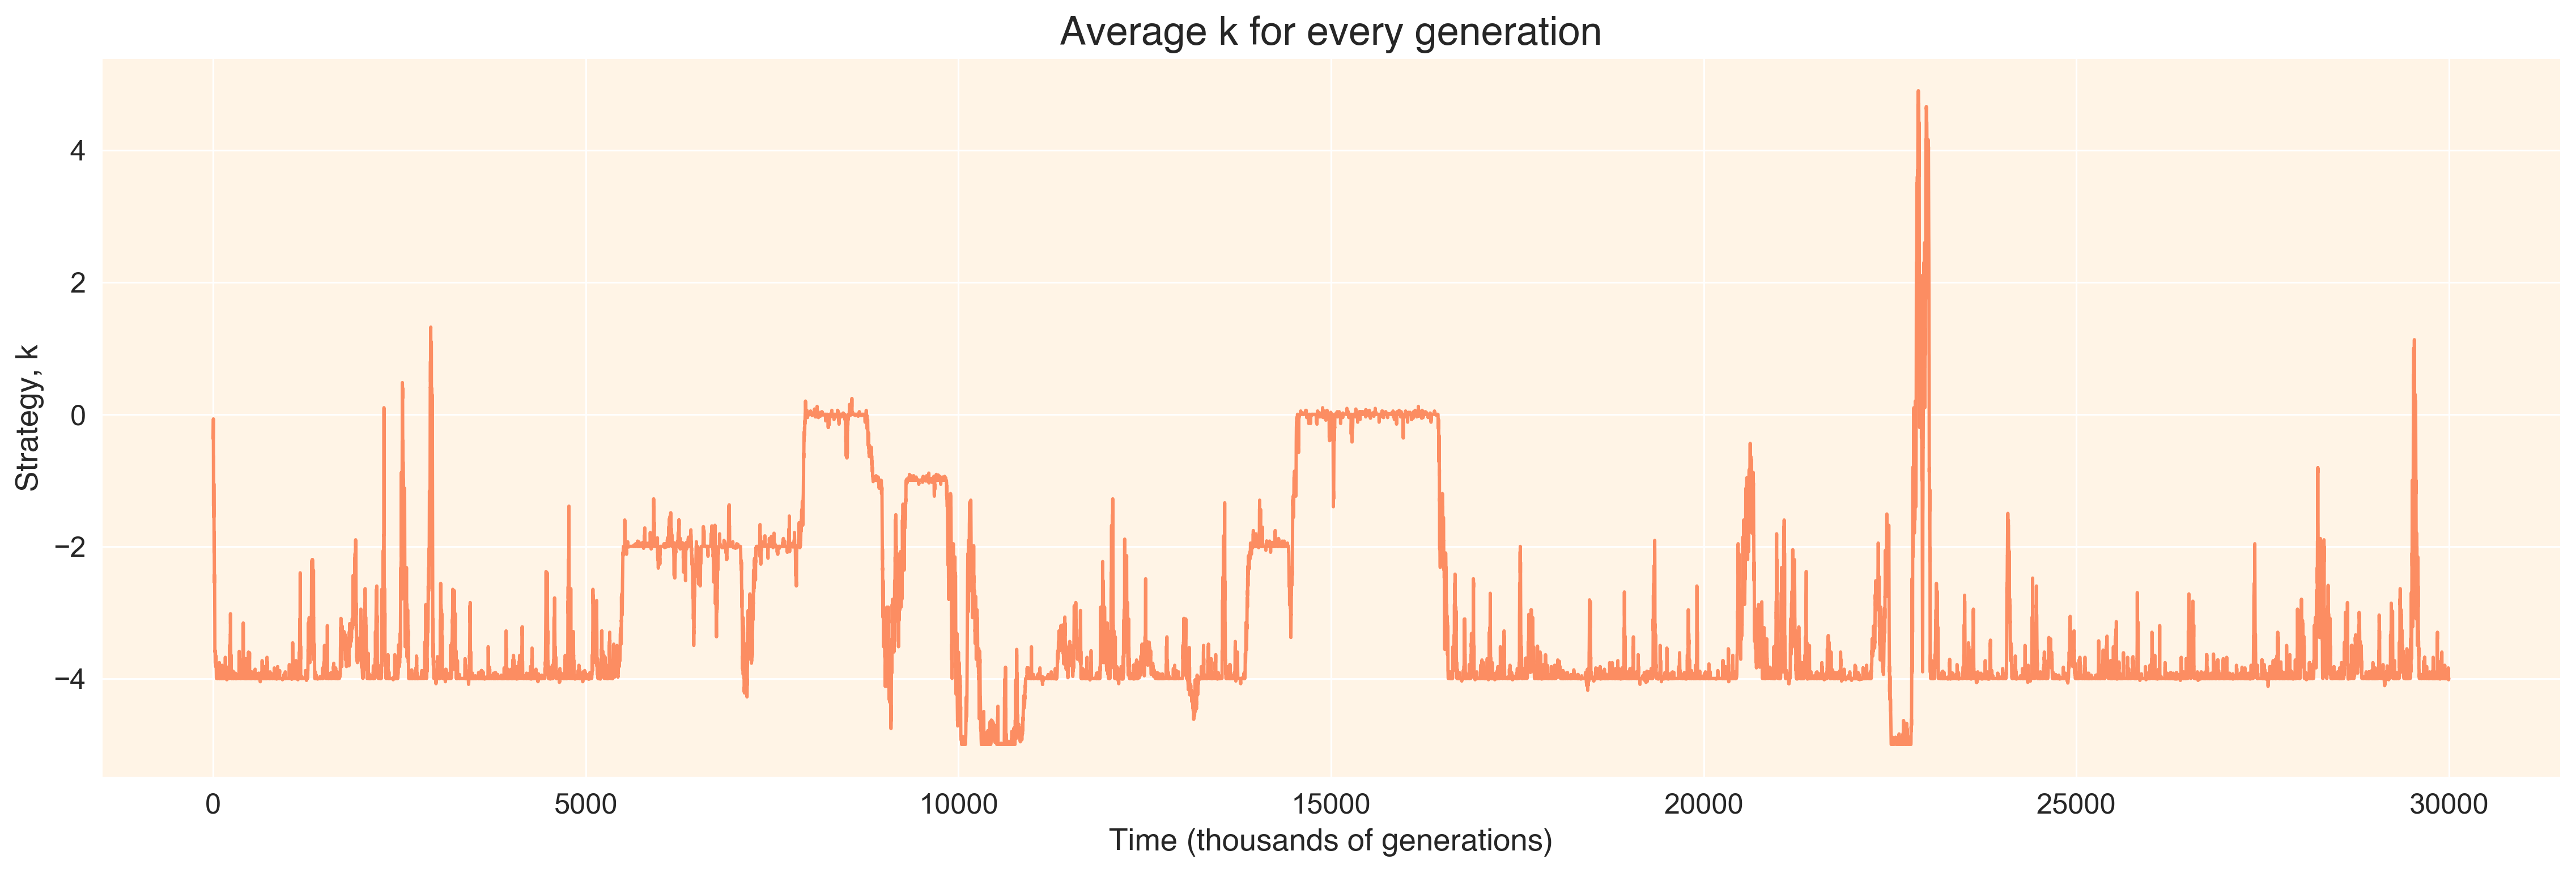

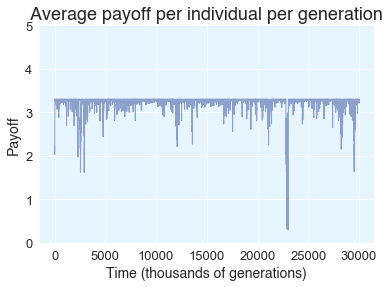

Counter({-4: 2034791, -2: 315897, 0: 307884, -5: 149346, -1: 107872, -3: 34258, 5: 16650, 4: 7925, 6: 7122, 2: 6822, 3: 5870, 1: 5563})


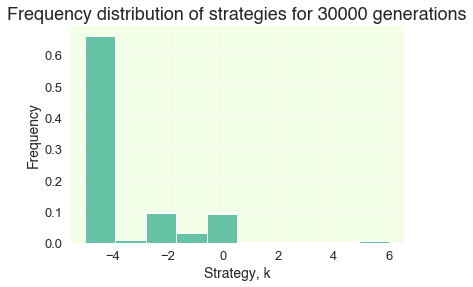

In [49]:

figure(figsize=(20, 6), dpi=280)
ax = plt.gca()
ax.set_facecolor("#fff4e6")

plt.xlabel('Time (thousands of generations)',fontname='Helvetica')
plt.ylabel('Strategy, k',fontname='Helvetica')
plt.title('Average k for every generation',fontname='Helvetica')
plt.plot(mean_strategy_per_generation, color=sns.color_palette('Set2')[1])
plt.show()



figure(figsize=(20, 6), dpi=280)


plt.xlabel('Time (thousands of generations)',fontname='Helvetica')
plt.ylabel('Payoff',fontname='Helvetica')
ax = plt.gca()
ax.set_ylim([0, 5])
ax.set_facecolor("#e6f5ff")

plt.title('Average payoff per individual per generation',fontname='Helvetica')
x = range(0,generations)
plt.plot(x, mean_payoff_per_generation, color=sns.color_palette('Set2')[2], linewidth=1)
plt.show()




plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Frequency distribution of strategies for {} generations'.format(generations),fontname='Helvetica')
x = range(0,generations)
print(Counter(global_strategies_numpy))
plt.hist( global_strategies_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()

In [ ]:
def simulate(generations, benefit, cost, population, simulations):
    mean_strategy_per_generation = []
    mean_payoff_per_generation = []
    global_strategies = []

    for simulation in range(simulations):

        agents = []
        for i in range(population):
            agents.append(Agent(random.randint(min_strat, max_strat), 0,0))


        for generation in range(generations) :
            if(generation % 1000 == 0):
                print(generation)
            for pair in range(pairs) :
                donor,recipient = random.sample(agents, 2)

                if recipient.score >= donor.strategy:

                    recipient.payoff += benefit
                    donor.add_score(benefit)
                else:
                    donor.add_score(-benefit)

                recipient.payoff += cost


            payoffs = []
            for agent in agents:
                payoffs.append(agent.payoff)


            new_agents = []
            agents.sort(key=lambda x: x.payoff, reverse=True)
            for agent in range(len(agents)):

                randomValue    = random.uniform(0.0, 1.0)
                if randomValue <= mutation:
                    new_agents.append(Agent(random.randint(min_strat, max_strat), 0,0))
                else:
                    parent = selectOne(agents)
                    new_agents.append(Agent(parent.strategy, 0,0))


            agents = new_agents

            estrategias = []
            total = 0
            for agent in agents:
                estrategias.append(agent.strategy)
                global_strategies.append(agent.strategy)

            estrategias_numpy = numpy.array(estrategias)
            payoffs_numpy = numpy.array(payoffs)


            mean_strategy_per_generation.append(estrategias_numpy.mean())
            mean_payoff_per_generation.append(payoffs_numpy.mean())


    global_strategies_numpy = numpy.array(global_strategies)
    
    return (mean_strategy_per_generation,mean_payoff_per_generation,global_strategies_numpy  )
print("Done! :D")